[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


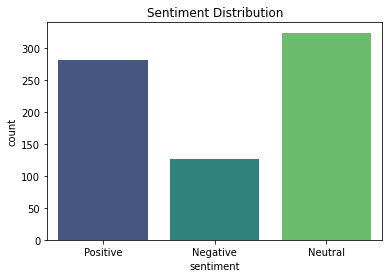

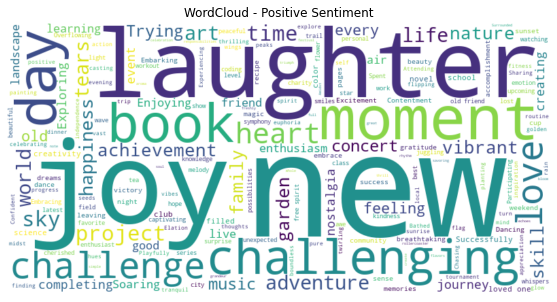

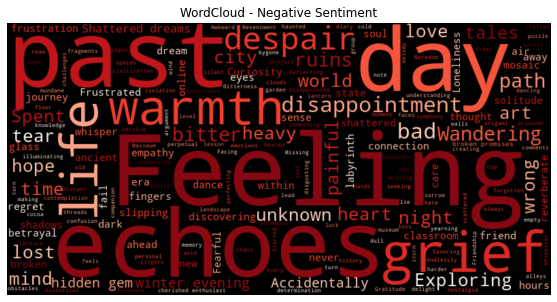

In [5]:
# 📌 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import nltk
nltk.download('punkt')

# ✅ Step 1: Load dataset
df_sent = pd.read_csv("C:/Users/ASUS/Documents/CodeVeda/Data Set For Task/3) Sentiment dataset.csv")

# ✅ Step 2: Drop missing values
df_sent.dropna(subset=['Text'], inplace=True)

# ✅ Step 3: Create Sentiment Polarity
df_sent['polarity'] = df_sent['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# ✅ Step 4: Classify Sentiment
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df_sent['sentiment'] = df_sent['polarity'].apply(get_sentiment)

# ✅ Step 5: Sentiment Distribution Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df_sent, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

# ✅ Step 6: WordCloud for Positive Sentiment
positive_text = " ".join(df_sent[df_sent['sentiment']=="Positive"]['Text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Sentiment")
plt.show()

# ✅ Step 7: WordCloud for Negative Sentiment
negative_text = " ".join(df_sent[df_sent['sentiment']=="Negative"]['Text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Sentiment")
plt.show()
